In [47]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [48]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import xarray as xr
import Nio
print (Nio.__version__)
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import signal
%matplotlib inline

print("python version:")
import platform
print(platform.python_version())

1.5.5
python version:
3.7.3


In [49]:
precipdatpALLIN = xr.open_dataset('pALLIN.nc', decode_times=False)
precipdatpALLIN
time = pd.date_range('1874-05-31', freq='M', periods=1752)
precipALLIN = xr.Dataset({'data': ('data', precipdatpALLIN['precip']), 'time': time, 'foo': ('int', np.arange(1752))})
precipALLIN

<xarray.Dataset>
Dimensions:  (data: 1752, int: 1752, time: 1752)
Coordinates:
  * data     (data) float32 19.6 10.7 14.5 33.9 63.6 ... 168.7 52.1 8.0 7.0
  * time     (time) datetime64[ns] 1874-05-31 1874-06-30 ... 2020-04-30
Dimensions without coordinates: int
Data variables:
    foo      (int) int64 0 1 2 3 4 5 6 7 ... 1745 1746 1747 1748 1749 1750 1751

In [50]:
#precipitation

junenumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 6):
        junenumber.append(x)
#print precipALLIN.data[junenumber]

junedata = precipALLIN.sel(time = precipALLIN['time.month']==6, int = junenumber)
juneprecipALLIN = junedata.data[junenumber]
#print juneprecipALLIN

julynumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 7):
        julynumber.append(x)
#print precipALLIN.data[julynumber]

julydata = precipALLIN.sel(time = precipALLIN['time.month']==7, int = julynumber)
julyprecipALLIN = julydata.data[julynumber]
#print julyprecipALLIN

augustnumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 8):
        augustnumber.append(x)
#print precipALLIN.data[augustnumber]

augustdata = precipALLIN.sel(time = precipALLIN['time.month']==8, int = augustnumber)
augustprecipALLIN = augustdata.data[augustnumber]
#print augustprecipALLIN

septembernumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 9):
        septembernumber.append(x)
#print precipALLIN.data[septembernumber]

septemberdata = precipALLIN.sel(time = precipALLIN['time.month']==9, int = septembernumber)
septemberprecipALLIN = septemberdata.data[septembernumber]
#print septemberprecipALLIN

rainfallforAIRIfull = juneprecipALLIN.data + julyprecipALLIN.data + augustprecipALLIN.data + septemberprecipALLIN.data
rainfallforAIRIfull


array([ 848.7999 ,  913.6    ,  757.30005,  974.5    ,  929.7    ,
        777.69995,  604.     ,  976.1    ,  897.80005,  820.10004,
        861.3    ,  902.89996,  849.2999 ,  932.80005,  847.39996,
        874.39996,  899.3    ,  811.6    ,  930.60004,  905.5    ,
        792.4    ,  991.6    ,  954.9    ,  971.4    ,  823.60004,
        828.49994,  891.1    ,  884.6    ,  629.     ,  889.3    ,
        722.     ,  791.80005,  860.8    ,  750.3    ,  716.4    ,
        884.89996,  777.49994,  897.     ,  889.3    ,  934.89996,
        736.30005,  805.80005,  784.4    ,  898.     ,  780.6    ,
        950.6    , 1004.2    ,  650.8    ,  884.5    ,  719.     ,
        865.8    ,  869.     ,  823.     ,  862.6    ,  803.60004,
        902.6    ,  853.     ,  767.7    ,  821.1    ,  804.4    ,
        877.     ,  803.4    ,  975.8    ,  913.39996,  843.5    ,
        908.19995,  841.89996,  908.19995,  789.4    ,  853.1    ,
        728.30005,  957.69995,  868.2001 ,  920.3    ,  910.80

In [72]:
rainfalldata = []
for y in range(81): #119
    rainfalldata.append(rainfallforAIRIfull[y+26])

Ydata = ((rainfalldata - np.mean(rainfalldata))/np.std(rainfalldata)) 

In [52]:
#DMI HadISST1
DMIHAD = xr.open_dataset('data/ihadisst1_dmi_1900_2019.nc', decode_times=False)
DMIHAD
time = pd.date_range('1900-01-15', freq='M', periods=1440)
DMIHad = xr.Dataset({'data': ('data', DMIHAD['diff']), 'time': time, 'foo': ('int', np.arange(1440))})
DMIHad
# starts from 01/1900
DMIHaddata = DMIHad.sel(time = slice('1900-01-31', '2019-12-31'))
DMIHaddata


<xarray.Dataset>
Dimensions:  (data: 1440, int: 1440, time: 1440)
Coordinates:
  * data     (data) float32 -0.2905474 -0.1140697 ... 1.092926 0.4654948
  * time     (time) datetime64[ns] 1900-01-31 1900-02-28 ... 2019-12-31
Dimensions without coordinates: int
Data variables:
    foo      (int) int64 0 1 2 3 4 5 6 7 ... 1433 1434 1435 1436 1437 1438 1439

In [53]:
junenumber = []
for x in range(1428):
    y = (x + 1) % 12
    if (y == 6):
        junenumber.append(x)

junedata = DMIHaddata.sel(time = DMIHaddata['time.month']==6, int = junenumber)
juneDMIHad = junedata.data[junenumber]

julynumber = []
for x in range(1428):
    y = (x + 1) % 12
    if (y == 7):
        julynumber.append(x)

julydata = DMIHaddata.sel(time = DMIHaddata['time.month']==7, int = julynumber)
julyDMIHad = julydata.data[julynumber]

augnumber = []
for x in range(1428):
    y = (x + 1) % 12
    if (y == 8):
        augnumber.append(x)

augdata = DMIHaddata.sel(time = DMIHaddata['time.month']==8, int = augnumber)
augDMIHad = augdata.data[augnumber]

septnumber = []
for x in range(1428):
    y = (x + 1) % 12
    if (y == 9):
        septnumber.append(x)

septdata = DMIHaddata.sel(time = DMIHaddata['time.month']==9, int = septnumber)
septDMIHad = septdata.data[septnumber]

fullDMIHad = juneDMIHad.data + julyDMIHad.data + augDMIHad.data + septDMIHad.data
fullDMIHad

XDMIHaddata = ((fullDMIHad - np.mean(fullDMIHad))/np.std(fullDMIHad)) 
print(XDMIHaddata)

[-0.2049865  -1.4861517   1.0592475  -0.70632654 -0.40197098  0.13069284
 -2.1362133  -0.93140393 -0.16589108 -1.9646573  -1.5959272  -1.1528634
 -0.7600219  -0.06083509  1.1893383  -0.4444344  -1.5012468  -0.8109417
  0.49361724  0.0214081  -0.53893965 -0.73714316 -0.31528598  0.5971712
 -0.5778652   0.97254676  0.4321149  -0.654855   -1.2594811  -0.2326375
 -0.40979144 -0.78812224 -0.30831435 -1.3358833   0.17833759  0.6950873
  0.14930296 -0.06087256 -0.38087747 -0.16145128  0.04768889 -0.3241897
 -1.8445567   0.52470946  0.77925533 -0.882148    0.50367785 -0.8746997
 -0.1551868   0.7158523  -0.4219283   0.57852554 -0.27035064  0.24233027
 -1.1475044  -0.636507   -1.6996051  -0.3579049  -2.4103484  -1.4720759
 -1.0567584   2.1794667  -0.22451776  1.156378   -1.2379458  -0.21633878
  0.8628416   1.1137432  -0.37023833 -0.37775147 -0.5728783  -0.55824953
  2.4413111  -0.71256804 -0.23793513 -0.05983096  1.4006405   0.22527522
  0.23910703  0.2776737  -1.0764196  -0.77342063  1.6554234

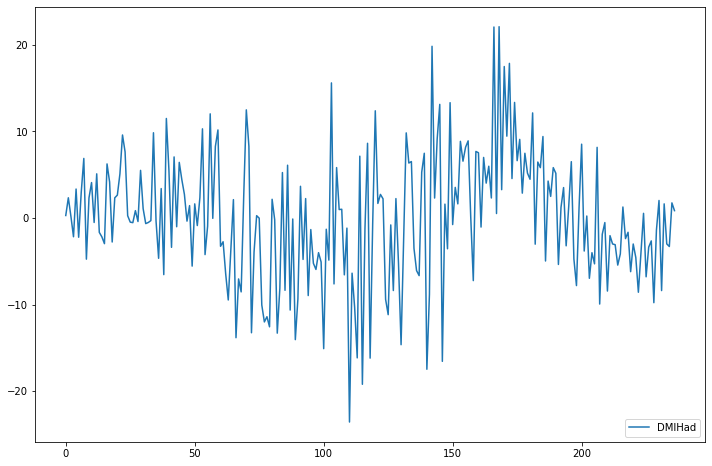

In [54]:
DMIHadcorr = signal.correlate(XDMIHaddata, Ydata)
#print(DMIHadcorr)
plt.figure(figsize=(12,8))
plt.plot(DMIHadcorr, label='DMIHad')
plt.legend(loc='lower right')

In [55]:
#DMI ERSSt
DMIERSST = xr.open_dataset('data/idmi_ersst_1900_2019.nc', decode_times=False)
DMIERSST
time = pd.date_range('1900-01-15', freq='M', periods=1440)
DMIersst = xr.Dataset({'data': ('data', DMIERSST['diff']), 'time': time, 'foo': ('int', np.arange(1440))})
DMIersst
# starts from 01/1900
DMIersstdata = DMIersst.sel(time = slice('1900-01-31', '2019-12-31'))
DMIersstdata


<xarray.Dataset>
Dimensions:  (data: 1440, int: 1440, time: 1440)
Coordinates:
  * data     (data) float32 -0.3667318 -0.005195707 ... 1.741528 0.5736688
  * time     (time) datetime64[ns] 1900-01-31 1900-02-28 ... 2019-12-31
Dimensions without coordinates: int
Data variables:
    foo      (int) int64 0 1 2 3 4 5 6 7 ... 1433 1434 1435 1436 1437 1438 1439

In [56]:
junenumber = []
for x in range(1428):
    y = (x + 1) % 12
    if (y == 6):
        junenumber.append(x)

junedata = DMIersstdata.sel(time = DMIersstdata['time.month']==6, int = junenumber)
juneDMIersst = junedata.data[junenumber]

julynumber = []
for x in range(1428):
    y = (x + 1) % 12
    if (y == 7):
        julynumber.append(x)

julydata = DMIersstdata.sel(time = DMIersstdata['time.month']==7, int = julynumber)
julyDMIersst = julydata.data[julynumber]

augnumber = []
for x in range(1428):
    y = (x + 1) % 12
    if (y == 8):
        augnumber.append(x)

augdata = DMIersstdata.sel(time = DMIersstdata['time.month']==8, int = augnumber)
augDMIersst = augdata.data[augnumber]

septnumber = []
for x in range(1428):
    y = (x + 1) % 12
    if (y == 9):
        septnumber.append(x)

septdata = DMIersstdata.sel(time = DMIersstdata['time.month']==9, int = septnumber)
septDMIersst = septdata.data[septnumber]

fullDMIERSST = juneDMIersst.data + julyDMIersst.data + augDMIersst.data + septDMIersst.data
fullDMIERSST

XDMIERSSTdata = ((fullDMIERSST - np.mean(fullDMIERSST))/np.std(fullDMIERSST)) 
print(XDMIERSSTdata)

[ 0.21085429 -1.1069306   0.9953361  -0.22001152 -0.08420348 -0.18952884
 -2.2993376  -1.2729505  -0.33626822 -2.2047086  -1.7361054  -1.3469708
 -0.7394427   0.25572643  0.55399305 -0.08254442 -1.3713123  -1.471873
 -0.4015236  -0.65934306 -1.345902   -0.9886954  -0.16479227  0.62785655
  0.16617016  1.1047122   0.8957764  -0.8439167  -1.0510976   0.42024183
 -0.7047993  -0.21857977 -0.14249074 -1.1028504   0.5596886   1.2332791
  0.5349078   0.16486323 -0.7366559  -0.08123317  0.37879553  0.15152383
 -1.3459631   0.75356394  0.49653205  2.146288    1.7236401  -0.15369684
  0.2998077   0.9583152  -0.30097872  0.05783591 -0.6210941   0.3402231
 -0.89379257 -0.61739796 -1.147099   -0.0536732  -1.7331803  -1.0751432
 -1.445238    2.487665   -0.12129551  1.2742736  -0.83926684  0.11839274
  0.82987744  1.8814594  -0.04170459 -0.48491633 -0.18979414 -0.325541
  2.1845353  -0.3968888   0.00328047 -0.09033129  1.2911396   0.55963725
  0.6680556   0.32602948 -0.27754378 -0.68734616  1.2975756

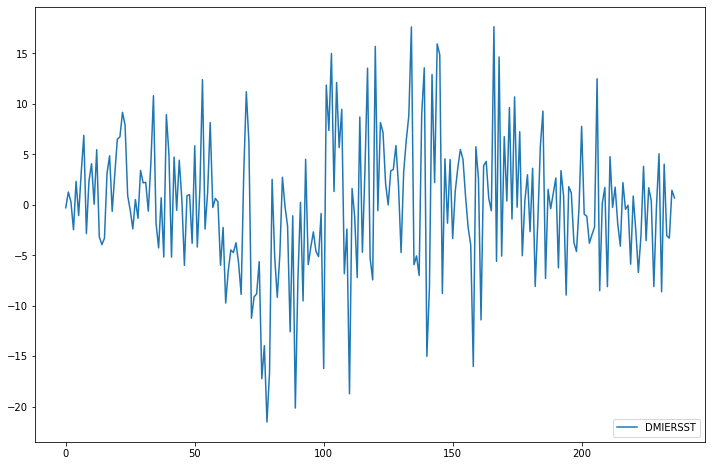

In [57]:
DMIERSSTcorr = signal.correlate(XDMIERSSTdata, Ydata)
#print(DMIERSSTcorr)
plt.figure(figsize=(12,8))
plt.plot(DMIERSSTcorr, label='DMIERSST')
plt.legend(loc='lower right')

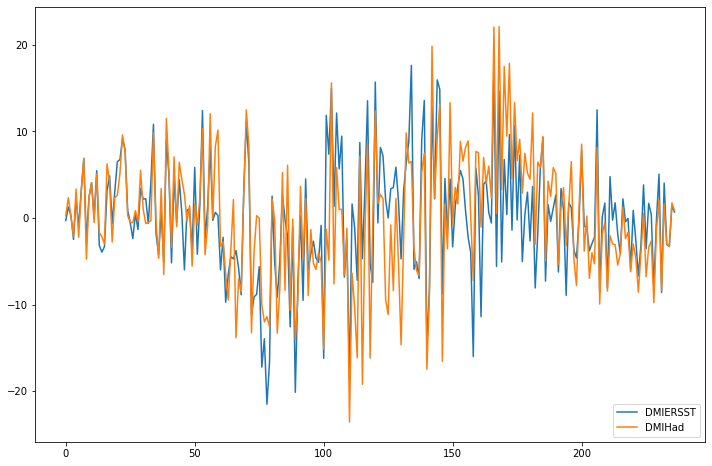

In [58]:
plt.figure(figsize=(12,8))
plt.plot(DMIERSSTcorr, label='DMIERSST')
plt.plot(DMIHadcorr, label='DMIHad')
plt.legend(loc='lower right')

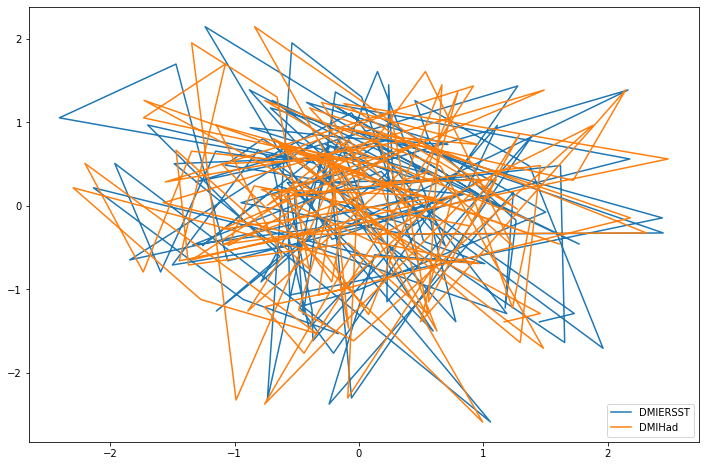

In [61]:
plt.figure(figsize=(12,8))
plt.plot(XDMIHaddata, Ydata, label='DMIERSST')
plt.plot(XDMIERSSTdata, Ydata, label='DMIHad')
plt.legend(loc='lower right')

In [62]:
from scipy import stats
HADcorr = stats.pearsonr(XDMIHaddata, Ydata)
ERSSTcorr = stats.pearsonr(XDMIERSSTdata, Ydata)
print(HADcorr)
print(ERSSTcorr)

#positive DMI more rainfall coast of java is cooler coast of africa is warmer

(-0.1360734297238645, 0.14005392463978034)
(-0.044465482802280513, 0.6311002655360798)


In [73]:
#ihadisst1_nino3.4a_1900_2019.nc
ENSO = xr.open_dataset('data/ihadisst1_nino3.4a_1900_2019.nc', decode_times=False)
ENSO
time = pd.date_range('1900-01-15', freq='M', periods=1440)
ENSOnino = xr.Dataset({'data': ('data', ENSO['Nino3.4']), 'time': time, 'foo': ('int', np.arange(1440))})
ENSOnino
# starts from 01/1900
ENSOninodata = ENSOnino.sel(time = slice('1900-01-31', '2019-12-31'))
ENSOninodata



<xarray.Dataset>
Dimensions:  (data: 1440, int: 1440, time: 1440)
Coordinates:
  * data     (data) float32 1.47361 1.31484 1.04526 ... 0.798553 0.524109
  * time     (time) datetime64[ns] 1900-01-31 1900-02-28 ... 2019-12-31
Dimensions without coordinates: int
Data variables:
    foo      (int) int64 0 1 2 3 4 5 6 7 ... 1433 1434 1435 1436 1437 1438 1439

In [74]:
junenumber = []
for x in range(972):
    y = (x + 1) % 12
    if (y == 6):
        junenumber.append(x)

junedata = ENSOninodata.sel(time = ENSOninodata['time.month']==6, int = junenumber)
juneENSOnino = junedata.data[junenumber]

julynumber = []
for x in range(972):
    y = (x + 1) % 12
    if (y == 7):
        julynumber.append(x)

julydata = ENSOninodata.sel(time = ENSOninodata['time.month']==7, int = julynumber)
julyENSOnino = julydata.data[julynumber]

augnumber = []
for x in range(972):
    y = (x + 1) % 12
    if (y == 8):
        augnumber.append(x)

augdata = ENSOninodata.sel(time = ENSOninodata['time.month']==8, int = augnumber)
augENSOnino = augdata.data[augnumber]

septnumber = []
for x in range(972):
    y = (x + 1) % 12
    if (y == 9):
        septnumber.append(x)

septdata = ENSOninodata.sel(time = ENSOninodata['time.month']==9, int = septnumber)
septENSOnino = septdata.data[septnumber]

fullENSOnino = juneENSOnino.data + julyENSOnino.data + augENSOnino.data + septENSOnino.data
fullENSOnino

XENSOninodata = ((fullENSOnino - np.mean(fullENSOnino))/np.std(fullENSOnino)) 
print(XENSOninodata)

[ 1.4873388  -0.32785496  2.3853908  -0.27770585  0.8668011   1.9483604
 -0.4587254  -0.43410936 -0.56523776 -1.5121542  -1.5896299  -0.17157157
 -0.06589179  0.07806661  1.2082222   0.8398768  -1.6957496   0.25452733
  0.600031    1.1819296   0.5948865  -0.19908853 -0.69194394  0.4432857
 -1.2359759   1.0180969   0.8103534  -0.08999339 -0.06739435  0.451186
  1.5062053   0.48552588  0.31257904 -1.2087154  -0.49135208 -0.18411359
 -0.27680302  0.12167519 -1.0980957   0.5790835   0.9103302   1.5832742
 -1.2041944   0.05186982  0.12560584 -1.0533583  -0.02926517 -0.55090165
  0.19582497 -0.7040745  -1.4094433   1.1755009  -0.69222397  0.8027776
 -1.5300901  -1.8918345  -1.3261093   1.3551023   0.33343756 -0.47018692
  0.04740353 -0.22045656 -0.31138372  1.3002669  -1.1961507   1.900309
  0.30013314 -0.27576151  0.621381    0.82020646 -1.1362815  -1.0310372
  1.9870255  -1.8289855  -0.6619897  -2.0352457   0.68968076  0.87088495
 -0.7296347   0.46094477  0.22533399]


In [75]:
from scipy import stats
ENSocorr = stats.pearsonr(XENSOninodata, Ydata)
print(ENSocorr)

(-0.1181503568177258, 0.2934834469044347)


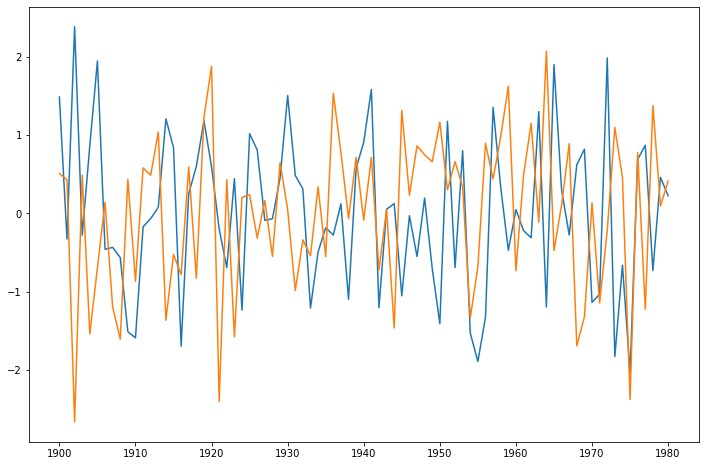

In [81]:
plt.figure(figsize=(12,8))
trainingyears = []
for x in range(81):
    trainingyears.append(x+1900)
plt.plot(trainingyears, XENSOninodata)
plt.plot(trainingyears, Ydata)

In [60]:
#idk what this means
clock = np.arange(64, len(Xdata), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(Xdata)
ax_orig.plot(clock, Xdata[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(Ydata)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
fig.show()


NameError: name 'Xdata' is not defined

In [ ]:
# Copyright (c) 2020 Medha Palavalli.